In [ ]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Reading the data on which analysis needs to be done

retail = pd.read_excel('/content/Online Retail.xlsx', header=0)
retail.head()

# This takes time!


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# shape of df
retail.shape

(541909, 8)

In [ ]:
# df info
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# df description
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Making a copy before processing data
retail_c = retail.copy()

<function matplotlib.pyplot.show(close=None, block=None)>

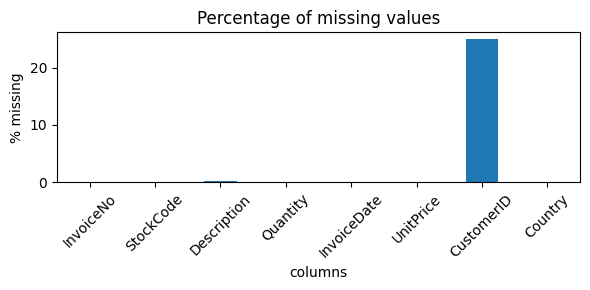

In [ ]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(retail_c.isnull().sum())/len(retail_c), 2)
plt.figure(figsize=(6,3))
df_null.plot(kind='bar')
plt.title('Percentage of missing values')
plt.xlabel('columns')
plt.ylabel('% missing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

In [ ]:
# Droping rows having missing values

retail_c = retail_c.dropna()
retail_c.shape

(406829, 8)

In [ ]:
# Changing the datatype of Customer Id as per Business understanding

retail_c['CustomerID'] = retail_c['CustomerID'].astype(str)

In [ ]:
retail_c.shape
rows_delete = ['sold in set?', 'lost in space', 'Dotcomgiftshop Gift Voucher £100.00', 'damaged', 'Missing', 'crushed boxes', 'Manual', 'wrongly marked carton 22804', 'throw away', 'returned', 'wet pallet', 'Display', 'mailout ', 'rusty throw away', 'reverse previous adjustment', 'Found', 'historic computer difference?....se', 'dotcom', 'showroom', 'wet', 'wrongly sold (22719) barcode', 'ebay', 'thrown away', 'sold as set/6 by dotcom', 'wrongly marked', 'Next Day Carriage', '?display?', 'Dotcomgiftshop Gift Voucher £50.00', 'mouldy', 'counted', 'adjust', 'sold as set on dotcom and amazon', 'faulty', 'michel oops', 'Breakages', 'mouldy, unsaleable.', 'stock check', 're-adjustment', 'alan hodge cant mamage this section', 'dotcom adjust', 'crushed', 'test', 'came coded as 20713', 'wrongly sold sets', 'amazon', 'smashed', 'amazon adjust', 'broken', 'damaged stock', 'wrongly marked 23343', 'sold as set on dotcom', '????missing', "thrown away-can't sell.", 'found box', 'incorrectly put back into stock', '?lost', 'John Lewis', 'to push order througha s stock was ', 'found some more on shelf', 'crushed ctn', '???lost', 'High Resolution Image', 'sold as set by dotcom', 'printing smudges/thrown away', '20713 wrongly marked', 'mixed up', 'taig adjust', "can't find", 'add stock to allocate online orders', 'incorrectly made-thrown away.', '?missing', 'damages', 'adjustment', 'missing?', 'sold with wrong barcode', 'label mix up', 'damages/display', 'damages/showroom etc', 'lost', 'website fixed', 'sold as 1', 'cracked', 'lost??', 'Dotcomgiftshop Gift Voucher £10.00', 'dotcom sales', 'for online retail orders', 'wrong code?', 'dotcomstock', 'did  a credit  and did not tick ret', 'Bank Charges', 'Adjustment', 'wrong code', 'Damages', '????damages????', 'amazon sales', 'reverse 21/5/10 adjustment', "thrown away-can't sell", 'damages?', '?? missing', 'wet boxes', 'Amazon Adjustment', '? sold as sets?', 'wrongly sold as sets', 're dotcom quick fix.', 'Discount', 'water damage', 'Crushed', 'damages wax', 'wet?', 'mix up with c', 'allocate stock for dotcom orders ta', 'Dagamed', 'missing', 'samples/damages', 'wrongly coded 20713', 'damages/dotcom?', 'Amazon', 'Show Samples', 'barcode problem', 'Dotcomgiftshop Gift Voucher £20.00', 'Dotcomgiftshop Gift Voucher £30.00', 'water damaged', 'sold as 22467', 'check', 'stock creditted wrongly', 'mouldy, thrown away.', 'rcvd be air temp fix for dotcom sit', 'Dotcomgiftshop Gift Voucher £40.00', 'on cargo order', 'samples', 'wrong barcode', 'mailout', 'dotcom sold sets', 'wrongly marked. 23343 in box', 'incorrect stock entry.', '???missing', 'Damaged', '*Boombox Ipod Classic', 'taig adjust no stock', 'had been put aside', 'wet damaged', 'wrong barcode (22467)', 'wet rusty', 'wrongly coded-23343', 'rusty thrown away', '?sold as sets?', 'wet/rusty', 'check?', 'code mix up? 84930', 'temp adjustment', 'Dotcom', 'found', 'wrongly coded 23343']
filtered_retail_c = retail_c[~retail_c['Description'].isin(rows_delete)]
filtered_retail_c.shape

(406192, 8)

In [ ]:
column_name = 'Description'

# Extract the "Description" column
description_column = filtered_retail_c[column_name]

# Initialize an empty set to store unique values
unique_values = set()

# Define a function to check if a string is likely an integer
def is_integer(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

# Loop through each value in the column
for value in description_column:
    # Check if the value is not likely an integer and has the first letter capitalized or is in lowercase
    if not is_integer(value) and (value.istitle() or value.islower()):
        # Add the unique value to the set
        unique_values.add(value)

# Convert the set to a list (if needed)
unique_values_list = list(unique_values)

# Print the unique values
print(f"The number of unique stuff is {len(unique_values_list)}")
print(unique_values_list)


The number of unique stuff is 0
[]


In [ ]:
retails = filtered_retail_c
retails.shape

(406192, 8)

In [ ]:
retails_c = retails.copy()

In [ ]:
retails_c['Amount'] = retails_c['Quantity']*retails_c['UnitPrice']
rfm_m = retails_c.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
# New Attribute : Frequency

rfm_f = retails_c.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
# New Attribute : Recency
# Convert to datetime to proper datatype
retails_c['InvoiceDate'] = pd.to_datetime(retails_c['InvoiceDate'],format='%d-%m-%Y %H:%M')

# Compute the maximum date to know the last transaction date
max_date = max(retails_c['InvoiceDate'])

In [ ]:
# Compute the difference between max date and transaction date

retails_c['Diff'] = max_date - retails_c['InvoiceDate']
retails_c.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [ ]:
# Compute last transaction date to get the recency of customers

rfm_p = retails_c.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [ ]:
# Extract number of days only

retails_c['Diff'] = rfm_p['Diff'].dt.days
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [ ]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Text(0.5, 0, 'Attributes')

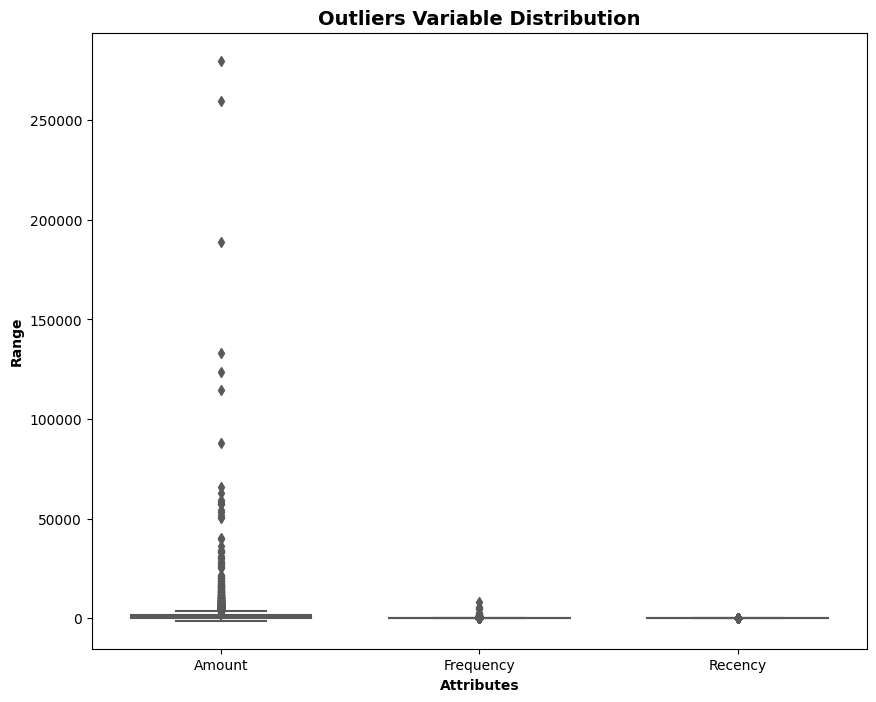

In [ ]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [ ]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4284, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.724590,-0.754084,2.297106
1,1.719091,1.041234,-0.905035
2,0.294408,-0.464838,-0.183565
3,0.271904,-0.045931,-0.737021
4,-0.534992,-0.604474,2.138975


In [ ]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [ ]:
kmeans.labels_

array([2, 0, 1, ..., 2, 1, 1], dtype=int32)

In [ ]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head(100)

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2
...,...,...,...,...,...
96,12463.0,1303.63,88,45,1
97,12464.0,1212.05,29,9,1
98,12465.0,733.89,51,7,1
99,12468.0,724.04,40,142,1


<Axes: xlabel='Cluster_Id', ylabel='Amount'>

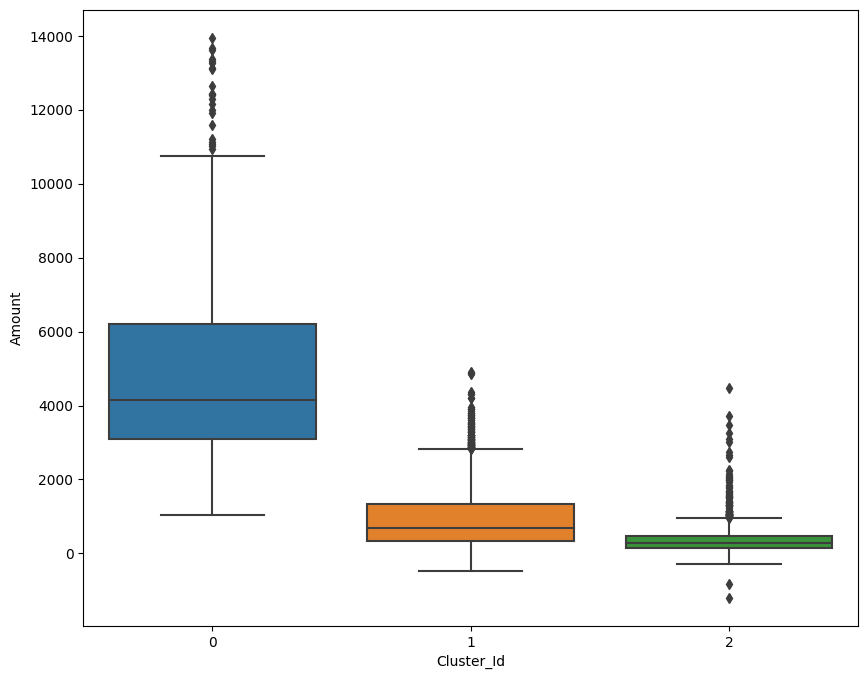

In [ ]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

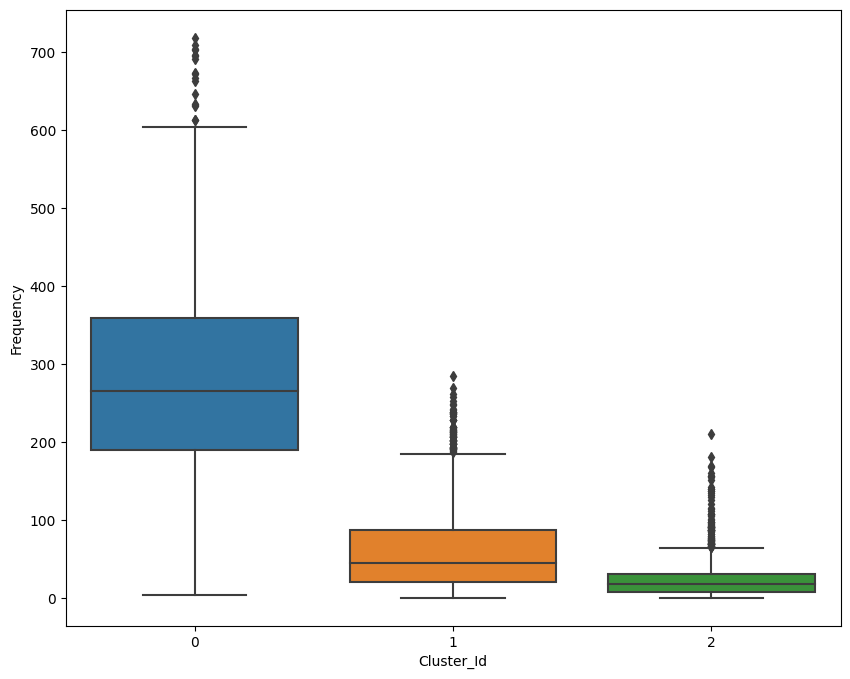

In [ ]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

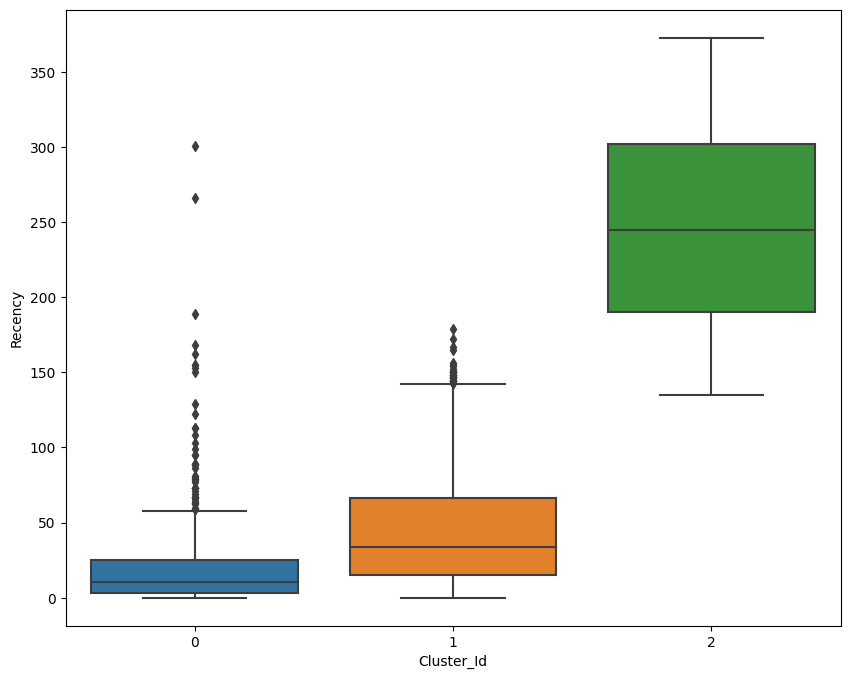

In [ ]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

In [ ]:
# Get CustomerID from the user
input_customer_id = input("""
Sample customer ID's - 12348.0, 12468.0, 17850.0
wrong ID: 99999

Enter a CustomerID: """)

# Find the cluster label for the input CustomerID
customer_cluster = rfm.loc[rfm['CustomerID'] == input_customer_id, 'Cluster_Id'].values

# Check if the customer was found and belongs to a cluster
if len(customer_cluster) == 1:
    cluster_id = customer_cluster[0]
    print(f"Customer {input_customer_id} belongs to Cluster {cluster_id}.")
    print('--'*50)

    # Provide an explanation for the cluster
    cluster_stats = rfm.groupby('Cluster_Id').agg({'Amount': 'mean', 'Frequency': 'mean', 'Recency': 'mean'})
    cluster_stats = cluster_stats.reset_index()

    if cluster_id == 0:
        print("This cluster represents customers who spend very less, purchase less frequently but often visit's the store.")
    elif cluster_id == 1:
        print("This cluster represents customers who spend alot, have high purchasing frequency, but are also the one who visit's the store least.")
    elif cluster_id == 2:
        print("This cluster represents customers who spend the least, have least frequency of purchase, but also visit the store alot.")

    print('--'*50)

    cluster_info = cluster_stats.loc[cluster_stats['Cluster_Id'] == cluster_id]
    print(f"Cluster {cluster_id} characteristics:")
    print(f"- Average ammount the customer spends: {cluster_info['Amount'].values[0]}")
    print(f"- Average frequency of the customer purchases: {cluster_info['Frequency'].values[0]}")
    print(f"- Average recency i.e. how often they visit the store: {cluster_info['Recency'].values[0]}")

else:
    print(f"Customer {input_customer_id} was not found in the dataset.")



Sample customer ID's - 12348.0, 12468.0, 17850.0
wrong ID: 99999

Enter a CustomerID: 99999
Customer 99999 was not found in the dataset.


## Thankyou